In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score,confusion_matrix,recall_score, accuracy_score, classification_report,roc_curve, roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("telco2.csv", sep=",") #load file
df2 = df.copy()
pd.set_option('max_columns',43)
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,34,1,0,56.95,1889.50,0,3,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,3,1,0,0,0,45,0,0,42.30,1840.75,0,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,24,1,1,84.80,1990.50,0,7,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,7039,0,0,1,1,72,1,1,103.20,7362.90,0,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,7041,1,1,1,0,4,1,1,74.40,306.60,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [3]:
df.drop(["Unnamed: 0"], axis =1, inplace = True)

In [4]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,3,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,7,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [5]:
y = df["Churn"]
X = df.drop(["Churn"], axis = 1)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Text(0.5, 1.0, 'All Data')

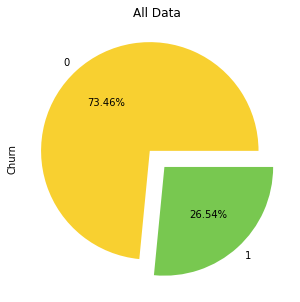

In [7]:
fig,ax=plt.subplots(ncols=1,figsize=(16,5)) #(Yes:1, No:0)
df["Churn"].value_counts().plot.pie(autopct="%.2f%%",colors=['#F8D030','#78C850'],explode = (0.1, 0.1))
plt.title("All Data")

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

## 1- Normal Application

###  Entropy

In [9]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 1337)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1337)

In [10]:
from sklearn.metrics import confusion_matrix

x_pred = decision_tree.predict(X_train)
y_pred = decision_tree.predict(X_test)

c_matrix_train = confusion_matrix(y_train, x_pred)
c_matrix_test = confusion_matrix(y_test, y_pred)

print("Confusion matrix (Train data)", "-"*30, c_matrix_train, sep="\n")
print("Confusion matrix (Test data)", "-"*30, c_matrix_test, sep="\n")

Confusion matrix (Train data)
------------------------------
[[3756  382]
 [ 780  716]]
Confusion matrix (Test data)
------------------------------
[[941  95]
 [193 180]]


In [11]:
TN = c_matrix_test[0][0]
TP = c_matrix_test[1][1]
FP = c_matrix_test[0][1]
FN = c_matrix_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 941
Doğru pozitif sayısı   : 180
Yanlış pozitif sayısı  : 95
Yanlış negatif sayısı  : 193


In [12]:
from sklearn.metrics import accuracy_score
print("Modelin eğitim verisindeki doğruluğu : ",decision_tree.score(X_train,y_train))
print("Modelden alınan doğruluk değeri : ", decision_tree.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score()        : ",  accuracy_score(y_test, y_pred))

Modelin eğitim verisindeki doğruluğu :  0.7937522186723465
Modelden alınan doğruluk değeri :  0.7955997161107168
Hesaplanan doğruluk değeri      :  0.7955997161107168
accuracy_score()        :  0.7955997161107168


In [13]:
test_array = np.array ([[1,0,0,0,62,0,0,43,2100,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0]])
decision_tree.predict(test_array)

array([0], dtype=int64)

In [14]:
from sklearn.metrics import f1_score,classification_report, precision_recall_fscore_support

print(classification_report(y_test,y_pred) )

print("f1_score()        : {:.2f}".format(f1_score(y_test, y_pred)))
print("recall_score()     : {:.2f}".format(recall_score(y_test, y_pred,average='macro')))
print("precision_score()  : {:.2f}".format(precision_score(y_test, y_pred,average='macro')))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, y_pred)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2])

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.78      1409

f1_score()        : 0.56
recall_score()     : 0.70
precision_score()  : 0.74


Hassasiyet : [0.829806   0.65454545]
Duyarlılık : [0.90830116 0.48257373]
F1 Skoru   : [0.86728111 0.55555556]


In [15]:
test_prediction_proba = decision_tree.predict_proba(X_test)[:,1]

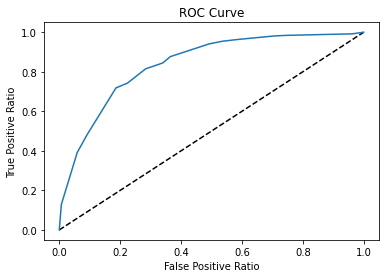

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

###  Gini

In [17]:
decision_tree2 = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state = 1337)
decision_tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1337)

In [18]:
y_pred2 = decision_tree2.predict(X_test)
print("Accuracy = {}".format(accuracy_score(y_test, y_pred2)))

Accuracy = 0.794180269694819


In [19]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## 2- With some important attributes

In [20]:
y2 = df2["Churn"]
X2 = df2[['tenure','MonthlyCharges']]

In [21]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

## Entropy

In [22]:
decision_tree3 = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 1337)
decision_tree3.fit(X2_train,y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1337)

In [23]:
y_pred3 = decision_tree3.predict(X2_test)
print("Accuracy = {}".format(accuracy_score(y2_test, y_pred3)))

Accuracy = 0.7913413768630234


## Gini

In [24]:
decision_tree4 = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state = 1337)
decision_tree4.fit(X2_train,y2_train)

DecisionTreeClassifier(max_depth=4, random_state=1337)

In [25]:
y_pred4 = decision_tree4.predict(X2_test)
print("Accuracy = {}".format(accuracy_score(y2_test, y_pred4)))

Accuracy = 0.7913413768630234


In [26]:
# let's graph the best result

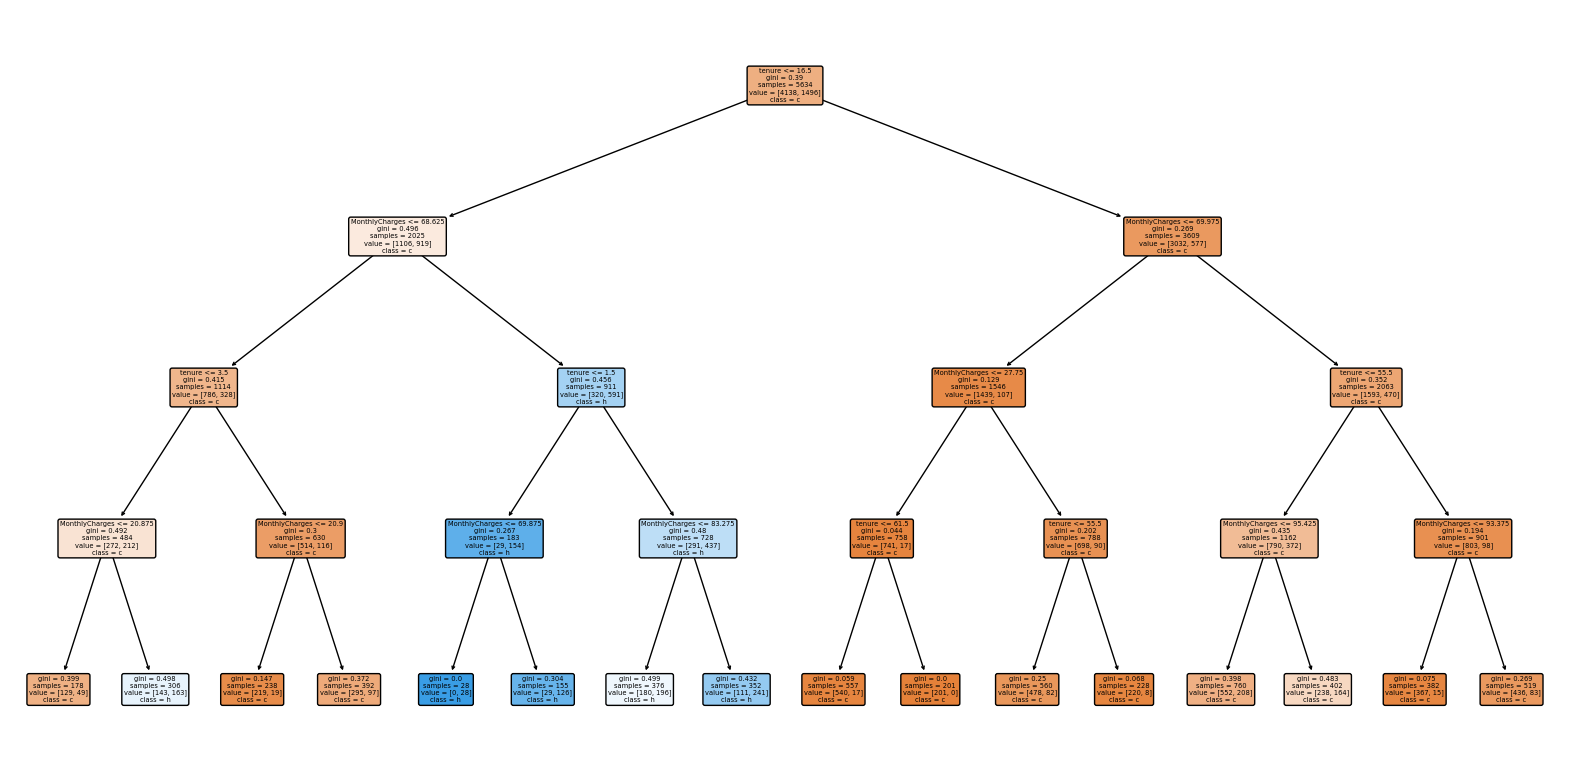

In [27]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10),dpi = 100)
tree.plot_tree(decision_tree4,feature_names=X2.columns,class_names='churn',rounded=True,impurity=True,filled=True)
plt.savefig("churn_dt.png")

## Optimization

In [28]:
decision_tree2 = DecisionTreeClassifier(criterion='entropy',random_state = 1337)
decision_params={"max_depth":np.arange(1,20),
          "max_features":np.arange(1,10)}

grids_decision=GridSearchCV(estimator=decision_tree2 ,
                     param_grid=decision_params,
                     cv=10)

grids_decision.fit(X_train,y_train)

print("Best Parameters: " + str(grids_decision.best_params_))
print("Best Skor:" + str(grids_decision.best_score_))

Best Parameters: {'max_depth': 5, 'max_features': 9}
Best Skor:0.785935905672499


In [30]:
grids_decision = grids_decision.cv_results_
grids_decision = pd.DataFrame(grids_decision)
grids_decision

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006205,0.003845,0.002499,0.001692,1,1,"{'max_depth': 1, 'max_features': 1}",0.734043,0.734043,0.734043,0.734043,0.735346,0.735346,0.735346,0.735346,0.733570,0.733570,0.734470,0.000736,120
1,0.004449,0.004310,0.002413,0.003686,1,2,"{'max_depth': 1, 'max_features': 2}",0.734043,0.734043,0.734043,0.734043,0.735346,0.735346,0.735346,0.735346,0.733570,0.733570,0.734470,0.000736,120
2,0.004843,0.004526,0.002014,0.003597,1,3,"{'max_depth': 1, 'max_features': 3}",0.734043,0.734043,0.734043,0.734043,0.735346,0.735346,0.735346,0.735346,0.733570,0.733570,0.734470,0.000736,120
3,0.004434,0.003431,0.003119,0.002702,1,4,"{'max_depth': 1, 'max_features': 4}",0.734043,0.734043,0.734043,0.734043,0.735346,0.735346,0.735346,0.735346,0.733570,0.733570,0.734470,0.000736,120
4,0.009242,0.001194,0.001410,0.001439,1,5,"{'max_depth': 1, 'max_features': 5}",0.734043,0.734043,0.734043,0.734043,0.735346,0.735346,0.735346,0.735346,0.733570,0.733570,0.734470,0.000736,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.010184,0.000680,0.002419,0.002962,19,5,"{'max_depth': 19, 'max_features': 5}",0.714539,0.710993,0.723404,0.726950,0.724689,0.726465,0.756661,0.751332,0.744227,0.744227,0.732349,0.014864,139
167,0.010890,0.002428,0.000612,0.000935,19,6,"{'max_depth': 19, 'max_features': 6}",0.728723,0.732270,0.719858,0.760638,0.694494,0.714032,0.735346,0.719361,0.694494,0.730018,0.722923,0.018616,166
168,0.011313,0.002427,0.002625,0.003614,19,7,"{'max_depth': 19, 'max_features': 7}",0.739362,0.755319,0.721631,0.734043,0.758437,0.740675,0.733570,0.715808,0.742451,0.749556,0.739085,0.012899,107
169,0.010896,0.002432,0.001418,0.002396,19,8,"{'max_depth': 19, 'max_features': 8}",0.721631,0.735816,0.735816,0.703901,0.742451,0.751332,0.717584,0.742451,0.735346,0.731794,0.731812,0.013180,141


# Best Model

In [31]:
import seaborn as sns

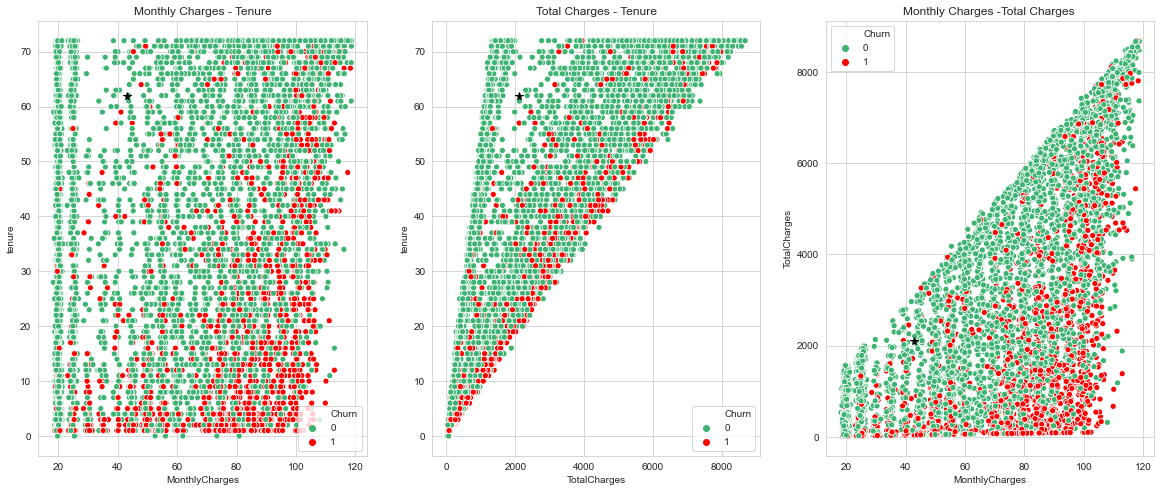

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(x="MonthlyCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title('Monthly Charges - Tenure')
plt.plot(43,62, color='black', marker='*', markersize=8)

plt.subplot(1,3,2)
sns.scatterplot(x="TotalCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title("Total Charges - Tenure")
plt.plot(2100,62, color='black', marker='*', markersize=8)

plt.subplot(1,3,3)
sns.scatterplot(x="MonthlyCharges", y="TotalCharges",palette=["mediumseagreen","red"], hue="Churn",data=df)
plt.title("Monthly Charges -Total Charges ")
plt.plot(43,2100, color='black', marker='*', markersize=8)

plt.show()

In [33]:
n_number = np.arange(1,32)
train_score = np.empty(len(n_number))
test_score = np.empty(len(n_number))

In [34]:
for i, k in enumerate(n_number):
    classifier2 = DecisionTreeClassifier(max_depth=k)
    classifier2.fit(X_train, y_train)
    train_score[i] = classifier2.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_score[i] = classifier2.score(X_test, y_test)

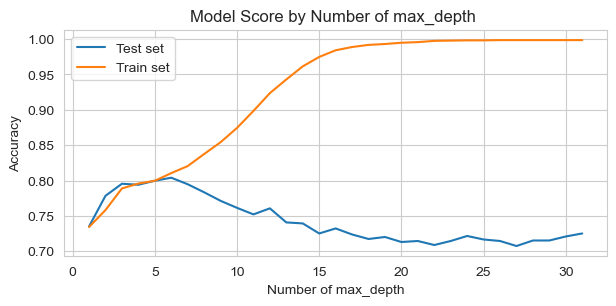

In [35]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(n_number,test_score, label = 'Test set')
plt.plot(n_number, train_score, label = 'Train set')
plt.legend()
plt.title('Model Score by Number of max_depth ')
plt.xlabel('Number of max_depth')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(grids_decision.best_params_, 'decisionmodel.pkl') 
joblib.dump(grids_decision.best_score_, 'decisionmodelscore.pkl')  
# Load the model from the file 
#decision_from_joblib = joblib.load('decisionmodel.pkl')  
#decision_from_score_joblib = joblib.load('decisionmodelscore.pkl')  